# Palmer Penguins Dataset Analysis

This notebook explores the Palmer Penguins dataset, which contains measurements for three penguin species (`Adelie`, `Chinstrap`, and `Gentoo`) from Antarctica. The data includes features like species, island, sex, bill length, bill depth, flipper length, and body mass.

## What We'll Do

- **Get to know the dataset:** Quick overview of what's inside.
- **Load and clean the data:** Import the data and handle any missing values.
- **Look at single features:** See how each variable is distributed.
- **Compare features:** Check how two features relate to each other.
- **Explore multiple features:** Use plots to see how several variables interact.
- **Summarize findings:** Highlight the main insights from the analysis.
- **Check data quality:** Note any missing or unusual data.

The goal is to use simple visualizations and summaries to understand the penguins and their features.

## Dataset Columns Overview

The Palmer Penguins dataset includes the following columns:

- **species**: The species of the penguin (`Adelie`, `Chinstrap`, or `Gentoo`).
- **island**: The island in the Palmer Archipelago where the penguin was observed (`Biscoe`, `Dream`, or `Torgersen`).
- **bill_length_mm**: Length of the penguin's bill (culmen) in millimeters.
- **bill_depth_mm**: Depth of the penguin's bill (culmen) in millimeters.
- **flipper_length_mm**: Length of the penguin's flipper in millimeters.
- **body_mass_g**: Body mass of the penguin in grams.
- **sex**: The biological sex of the penguin (`Male` or `Female`).
- **year**: The year in which the observation was recorded.

These features provide both categorical and numerical data, enabling a variety of analyses related to penguin morphology, distribution, and sexual dimorphism.

## Import the necessary libraries


In [21]:
### Import Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the datasets

In [22]:
# Load the Penguins dataset from the raw GitHub content URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)


## Some basic explorations and data cleaning on the Penguins Datasets

In [23]:
# Display the first few rows
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [24]:
#Display the summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Observations from above info

- The dataset contains 344 entries and 7 columns.
- Columns include both categorical (`species`, `island`, `sex`) and numerical (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`) data.
- Some columns have missing values, notably `sex` and `body_mass_g`.
- Data types are appropriate for analysis: object (categorical) and float64 (numerical).


In [25]:
#Display the brief statistical info of the dataset
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Additional Insights Unique to the Above Summary Table

- **Statistical Details:** The summary table provides specific statistics (mean, std, min, max, quartiles) for each numerical feature, allowing for a quick assessment of central tendency, spread, and potential outliers in the data.
- **Unique Value Counts:** For categorical columns, the table shows the number of unique values and the most frequent category, offering insight into class imbalance or dominant groups.
- **Data Completeness:** The count of non-null entries per column highlights exactly where missing data occurs, helping prioritize columns for cleaning or imputation.
- **Distribution Shape:** By comparing quartiles (25%, 50%, 75%), one can infer skewness or symmetry in the distributions, which is not immediately visible from raw data or simple plots.


## Dataset Overview
The Palmer Penguins dataset contains biological measurements for three species of penguins (`Gentoo`, `Adelie` and `Chinstrap`) observed in Antarctica. It includes categorical variables like species, island, and sex, as well as numerical measurements such as bill length, bill depth, flipper length, and body mass.

<Axes: >

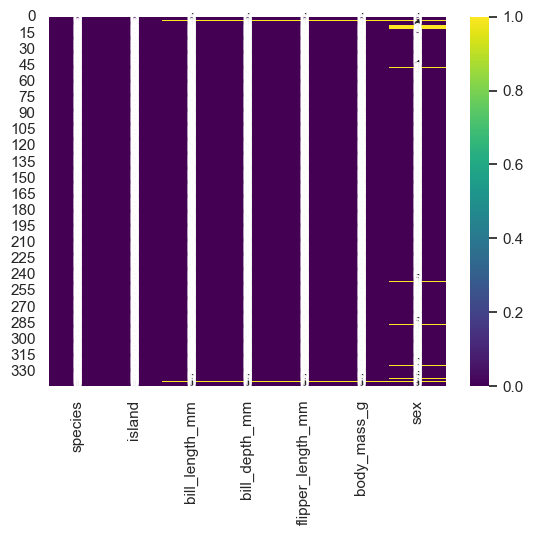

In [26]:
#Check for missing values
df.isnull().sum()
sns.heatmap(df.isnull(), annot=True, cmap='viridis')


### Observations: Missing Values

The heatmap above highlights missing values in the dataset. We observe that some entries have missing values, particularly in the `sex` and `body_mass_g` columns. These missing values will either be removed or imputed during preprocessing to ensure the accuracy of visualizations and analysis.


## Univariate Visualizations Analysis

## Count plot

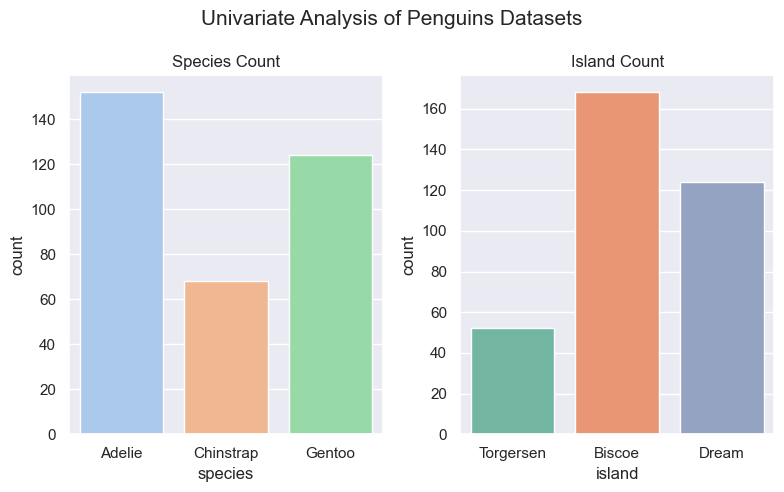

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#Setting up the visual theme
sns.set_theme(style="darkgrid")

#Prepare the figure layout
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Univariate Analysis of Penguins Datasets', fontsize=15)

#Count plot for species
sns.countplot(data=df, x='species', ax=axes[0], palette='pastel')
axes[0].set_title('Species Count')

#Count plot for island
sns.countplot(data=df, x='island', ax=axes[1], palette='Set2')
axes[1].set_title('Island Count')

#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations:
 **Species Count:** The count plot (left) displays the number of penguins for each species. Adelie penguins are the most numerous, followed by Gentoo and Chinstrap.

**Island Count:** The count plot (right) shows the distribution of penguins across islands. Most penguins were observed on Biscoe Island, with fewer on Dream and Torgersen.

## Histograms Visualizations

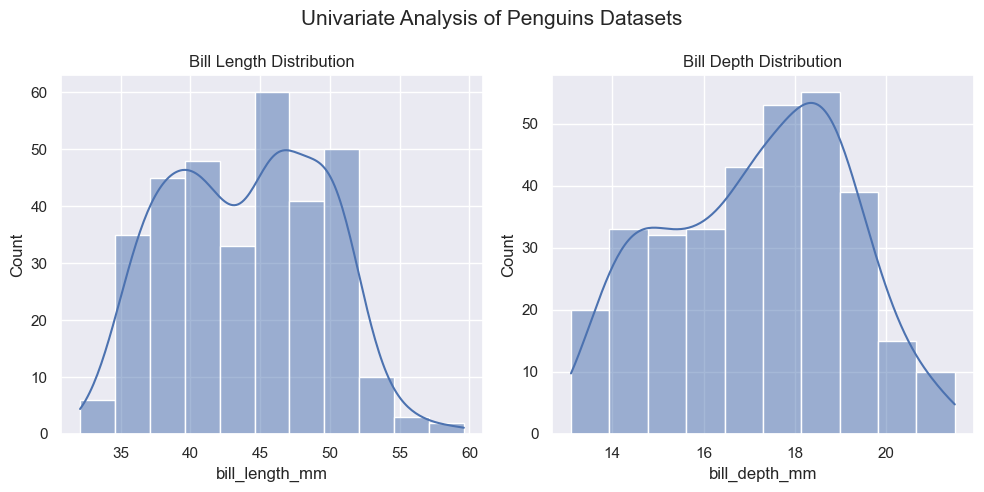

In [28]:
#Prepare the figure layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Univariate Analysis of Penguins Datasets', fontsize=15)

#Histogram for bill_length_mm
sns.histplot(data=df.dropna(), kde=True, x='bill_length_mm', ax=axes[0])
axes[0].set_title('Bill Length Distribution')

#Histogram for bill_depth_mm
sns.histplot(data=df.dropna(), kde=True, x='bill_depth_mm', ax=axes[1])
axes[1].set_title('Bill Depth Distribution')


#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations:
**Bill Length Distribution:** The histogram for bill length (left) illustrates a roughly normal distribution, peaking around 45 mm.

**Bill Depth Distribution:** The histogram for bill depth (right) shows a normal distribution, with most values clustering around 18 mm.

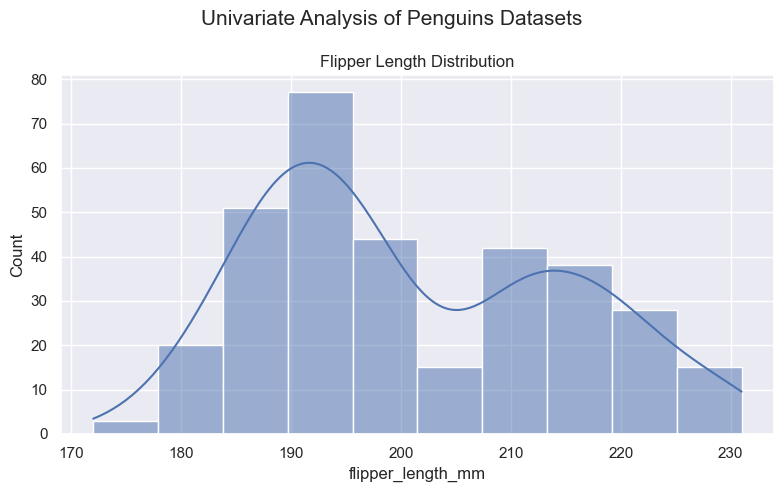

In [29]:
#Prepare the figure layout
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
fig.suptitle('Univariate Analysis of Penguins Datasets', fontsize=15)

#Histogram for flipper_length_mm
sns.histplot(data=df.dropna(), kde=True, x='flipper_length_mm', ax=axes)
axes.set_title('Flipper Length Distribution')

#Plotting all the histogram
plt.tight_layout()
plt.show()

 ### Observations:
 **Flipper Length Distribution:** The histogram for flipper length demonstrates a normal distribution, peaking near 190 mm.



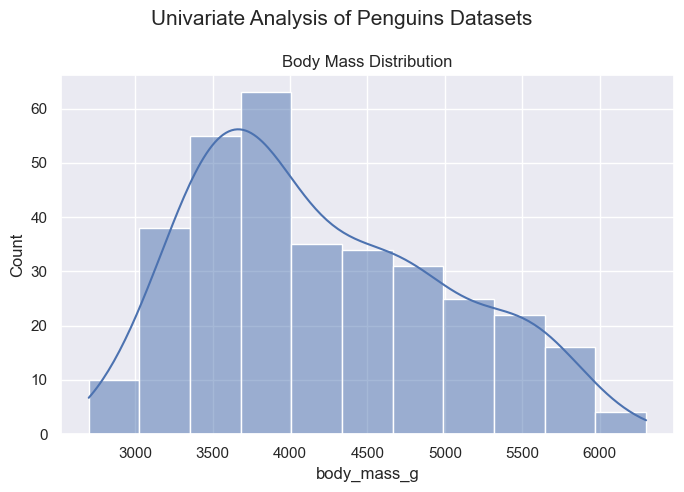

In [30]:
#Prepare the figure layout
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Univariate Analysis of Penguins Datasets', fontsize=15)

#Histogram for body_mass_g
sns.histplot(data=df.dropna(), kde=True, x='body_mass_g', ax=axes)
axes.set_title('Body Mass Distribution')

#Plotting all the histogram
plt.tight_layout()
plt.show()


### Observations:
**Body Mass Distribution:** The histogram for body mass is centered around 3500 g, with a roughly normal shape.



Each plot provides insight into the central tendency, spread, and potential outliers for its respective feature.

## Bivariate Visualizations Analysis

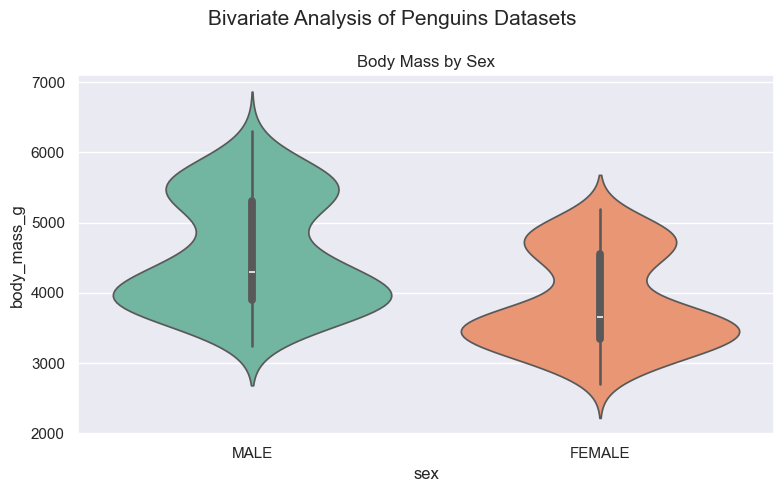

In [31]:
#Prepare the figure layout
fig, axes = plt.subplots(1,1, figsize=(8, 5))
fig.suptitle('Bivariate Analysis of Penguins Datasets', fontsize=15)

#Violin plot :Body max by sex
sns.violinplot(data=df, x='sex', y='body_mass_g', ax=axes, palette='Set2')
axes.set_title('Body Mass by Sex')


#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations: Body Mass by Sex

The boxplot compares body mass between male and female penguins. Males generally have higher body mass than females across all species, which aligns with known biological traits in penguins.


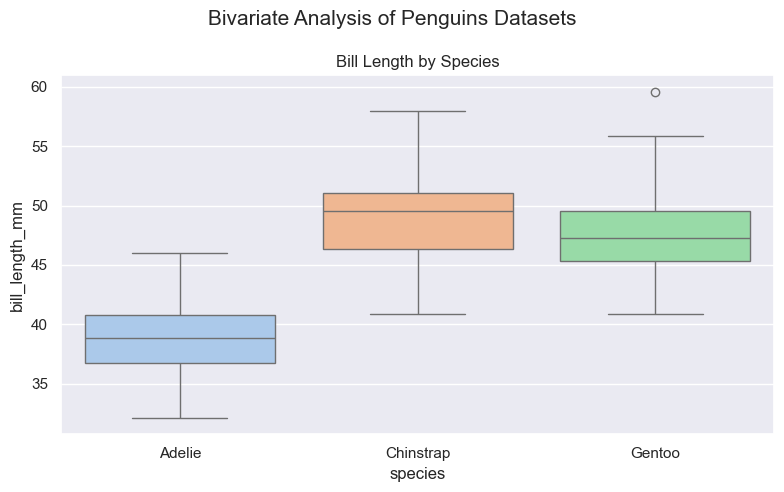

In [32]:
#Prepare the figure layout
fig, axes = plt.subplots(1, figsize=(8, 5))
fig.suptitle('Bivariate Analysis of Penguins Datasets', fontsize=15)

#Box plot: Bill length by species
sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes, palette='pastel')
axes.set_title('Bill Length by Species')

#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations: Bill Length by Species

The boxplot above compares the bill length across different penguin species. Gentoo penguins generally have the longest bills, followed by Chinstrap, while Adelie penguins have the shortest bills. This distinction in bill length can help differentiate between the species.

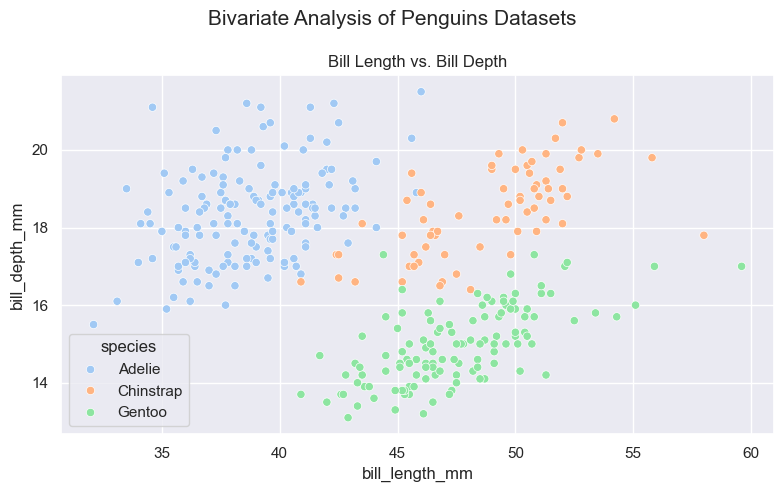

In [33]:
#Prepare the figure layout
fig, axes = plt.subplots(1, figsize=(8, 5))
fig.suptitle('Bivariate Analysis of Penguins Datasets', fontsize=15)

#Scatter plot: Bill length vs. Bill length
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes, palette='pastel')
axes.set_title('Bill Length vs. Bill Depth')

#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations: Bill Length vs. Bill Depth

The scatter plot above visualizes the relationship between bill length and bill depth for each penguin species. Distinct clusters are visible for Adelie, Chinstrap, and Gentoo penguins, indicating that these two features are effective for distinguishing between species. Adelie penguins tend to have shorter, deeper bills, Gentoo penguins have longer, shallower bills, and Chinstrap penguins fall in between. This separation highlights the usefulness of bill measurements in species classification.

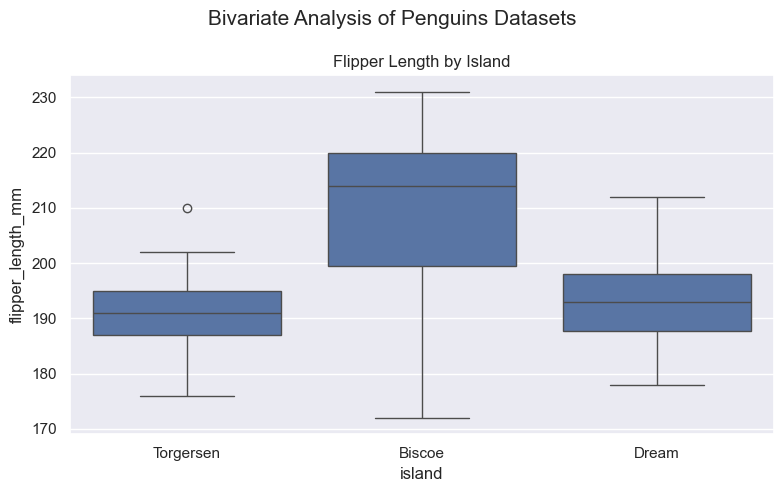

In [34]:
#Prepare the figure layout
fig, axes = plt.subplots(1, figsize=(8, 5))
fig.suptitle('Bivariate Analysis of Penguins Datasets', fontsize=15)

#Box plot : Flipper length by island
sns.boxplot(data=df, x='island', y='flipper_length_mm', ax=axes)
axes.set_title('Flipper Length by Island')

#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations: Flipper Length by Island

The boxplot above compares the flipper length of penguins across different islands. Penguins on Biscoe Island generally have longer flippers compared to those on Dream and Torgersen islands. This variation may reflect differences in species distribution or ecological adaptations among the islands.

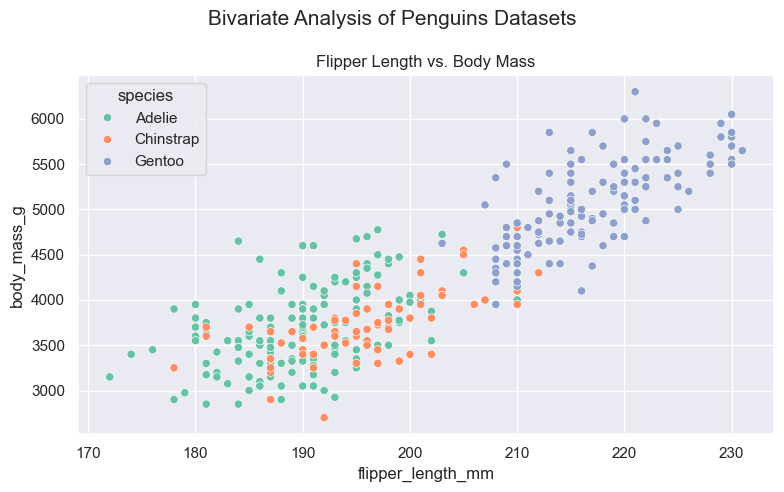

In [35]:
#Prepare the figure layout
fig, axes = plt.subplots(1, figsize=(8, 5))
fig.suptitle('Bivariate Analysis of Penguins Datasets', fontsize=15)


#Scatter plot: Flipper length vs. Body mass
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', ax=axes, palette='Set2')
axes.set_title('Flipper Length vs. Body Mass')

#Plotting all the histogram
plt.tight_layout()
plt.show()

### Observations: Flipper Length vs. Body Mass 

The scatter plot reveals a strong positive correlation between body mass and flipper length. Larger penguins tend to have longer flippers, which may be related to their swimming behavior or energy needs.


## Multivariate Visualizationa Analaysis

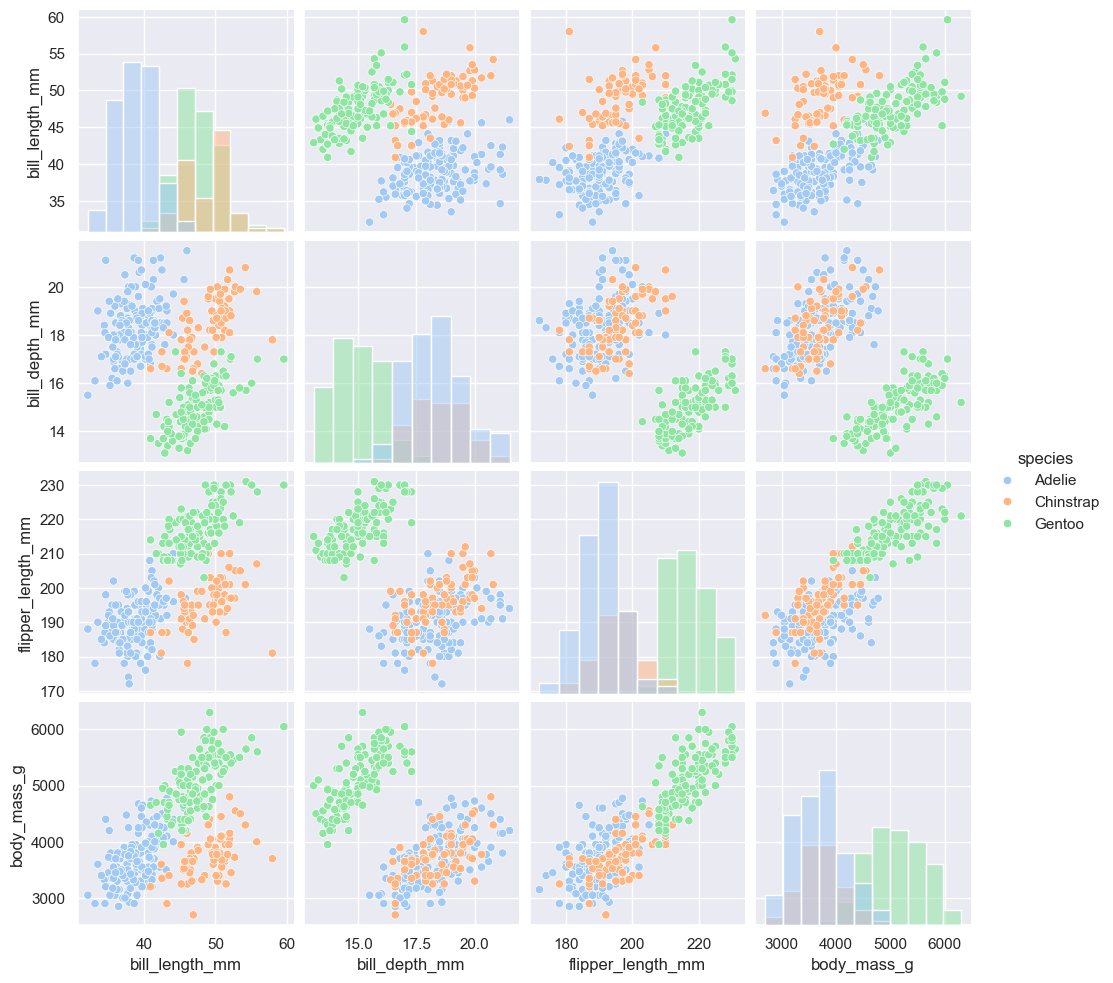

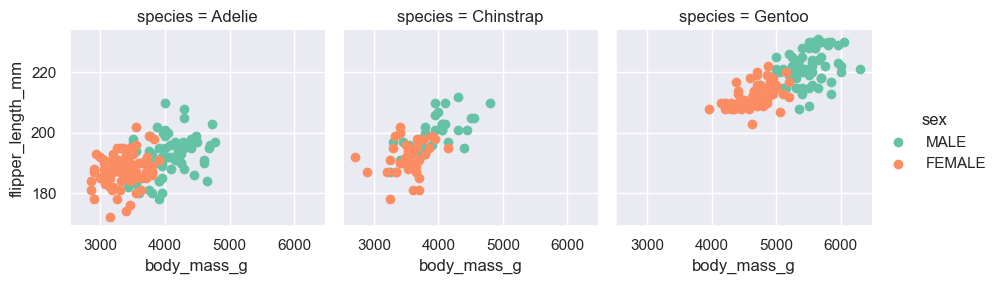

In [36]:
# Drop rows with missing values for accurate multivariate visualizations
df.dropna(inplace=True)

# Pairplot colored by species
sns.pairplot(data=df, hue='species', diag_kind='hist', palette='pastel')
plt.show()

# FacetGrid: Body Mass vs. Flipper length split by Sex and Species
g = sns.FacetGrid(data=df, col='species', hue='sex', palette='Set2')
g.map(plt.scatter, 'body_mass_g', 'flipper_length_mm').add_legend()
plt.show()


### Observations

The diagram above is a boxplot that displays the distribution of bill lengths for each penguin species in the Palmer Penguins dataset. Each box represents the interquartile range (IQR) of bill lengths for a species, with the line inside the box indicating the median value. Whiskers extend to show the range of the data, excluding outliers, which are plotted as individual points. This visualization helps compare the central tendency and spread of bill lengths among Adelie, Chinstrap, and Gentoo penguins, highlighting morphological differences between species.

<Axes: >

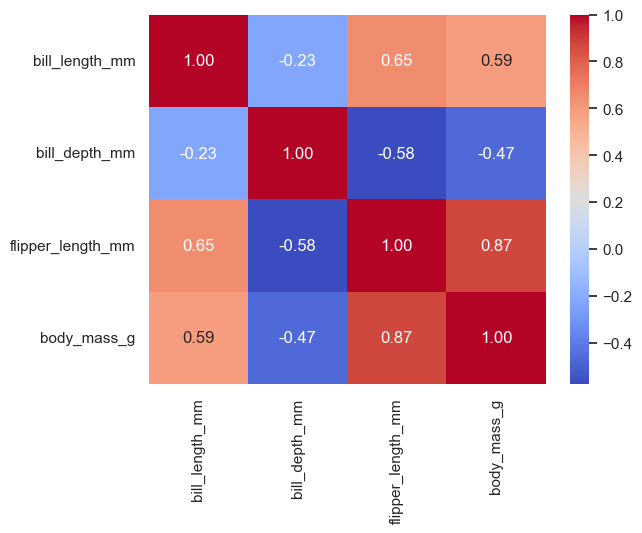

In [37]:

#Create a multivariate heatmap using only numeric columns.
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

###  Observations: Multivariate Correlation Heatmap

The heatmap above visualizes the correlation coefficients between the numerical features in the Penguins dataset. Strong positive correlations are observed between flipper length and body mass, indicating that penguins with longer flippers tend to have higher body mass. Bill length and bill depth show moderate correlation, while other features exhibit weaker relationships. This visualization helps identify which features are most closely related and can guide further analysis or feature selection for modeling.

## 5 key insights summary from above visual analysis

Insight 1: Gentoo Penguins Are Morphologically Distinct
From the pairplot and boxplots, Gentoo penguins clearly stand out:

They have longer bills, longer flippers, and higher body mass on average.

Visually separable from Adelie and Chinstrap in multiple features.

Insight 2: Sexual Dimorphism Is Evident
In the violin plots and FacetGrid:

Male penguins generally have greater body mass than females across all species.

This difference is particularly notable in Adelie and Gentoo species.

Insight 3: Flipper Length Varies by Island
The boxplot for flipper length vs. island shows:

Penguins on Biscoe Island tend to have longer flippers.

Torgersen hosts the smallest flipper ranges — possibly indicating species or ecological differences.



Insight 4: Bill Length and Depth Help Distinguish Species
From the scatter plot of bill length vs. bill depth:

Adelie: shorter and deeper bills.

Chinstrap: moderate in both.

Gentoo: long and shallow bills.

This makes these two features highly useful for species classification.

 Insight 5: Data Quality and Missing Values
Initial inspection showed:

Minor missing data in numeric features (~2 values each).

Sex column had 11 missing entries.

These can be cleaned easily and should be handled in modeling or dashboard us